In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
# Drop rows with missing values in the 'clean_text' column
train_data = train_data.dropna(subset=['clean_text'])

# Extract the text and sentiment columns
X_train = train_data['clean_text']
y_train = train_data['Sentiment']

In [9]:
# Fill missing values in the 'clean_text' column with a placeholder
train_data['clean_text'].fillna('unknown', inplace=True)

# Extract the text and sentiment columns
X_train = train_data['clean_text']
y_train = train_data['Sentiment']

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data
train_data = pd.read_csv(r"D:\Projects\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\RNN\tweets_train.csv")
test_data = pd.read_csv(r"D:\Projects\DL + AI Exam Paper\DL + AI Exam Paper\Dataset\RNN\tweets_test.csv")

# Handle missing values in the 'clean_text' column
train_data['clean_text'].fillna('unknown', inplace=True)
test_data['clean_text'].fillna('unknown', inplace=True)

# Extract the text and sentiment columns
X_train = train_data['clean_text']
y_train = train_data['Sentiment']
X_test = test_data['clean_text']

# Encode the sentiment labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dense(3, activation='softmax'))



C:\Users\ASUS\AppData\Local\Temp\ipykernel_9780\3808841982.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['clean_text'].fillna('unknown', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9780\3808841982.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_padded, y_train_encoded, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, validation_data=(X_val_split, y_val_split))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val_split, y_val_split)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Generate predictions
predictions = model.predict(X_test_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Convert predicted classes back to original labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Save predictions to a CSV file
test_data['Predicted_Sentiment'] = predicted_labels
test_data.to_csv('test_predictions.csv', index=False)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5993 - loss: 0.8473 - val_accuracy: 0.8697 - val_loss: 0.3747
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9099 - loss: 0.2788 - val_accuracy: 0.9138 - val_loss: 0.2933
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9569 - loss: 0.1481 - val_accuracy: 0.9171 - val_loss: 0.2845
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9668 - loss: 0.1105 - val_accuracy: 0.9203 - val_loss: 0.2910
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9751 - loss: 0.0885 - val_accuracy: 0.9156 - val_loss: 0.3415
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9810 - loss: 0.0629 - val_accuracy: 0.9029 - val_loss: 0.3644
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9828 - loss: 0.0637 - val_accuracy: 0.9218 - val_loss: 0.3545
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9847 - loss: 0.0549 - val_ac

In [12]:
# Example tweets
example_tweets = [
    "TheSocialDilemma is an eye opener isn't it please watch it!",
    "I loved TheSocialDilemma, it's so insightful and important.",
    "TheSocialDilemma is scary to see social media's impact on society.",
    "You check your social media before you pee in the morning.",
    "Watch thesocialdilemma and see what's actually happening.",
    "he is a very bad palyer and he is not good at all"
]

# Tokenize and pad the example tweets
example_tweets_seq = tokenizer.texts_to_sequences(example_tweets)
example_tweets_padded = pad_sequences(example_tweets_seq, maxlen=max_sequence_length)

# Predict sentiment
predictions = model.predict(example_tweets_padded)
predicted_classes = np.argmax(predictions, axis=1)

# Convert predicted classes back to original labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Display the predictions
for tweet, sentiment in zip(example_tweets, predicted_labels):
    print(f'Tweet: "{tweet}"\nPredicted Sentiment: {sentiment}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Tweet: "TheSocialDilemma is an eye opener isn't it please watch it!"
Predicted Sentiment: Neutral

Tweet: "I loved TheSocialDilemma, it's so insightful and important."
Predicted Sentiment: Positive

Tweet: "TheSocialDilemma is scary to see social media's impact on society."
Predicted Sentiment: Negative

Tweet: "You check your social media before you pee in the morning."
Predicted Sentiment: Positive

Tweet: "Watch thesocialdilemma and see what's actually happening."
Predicted Sentiment: Neutral

Tweet: "he is a very bad palyer and he is not good at all"
Predicted Sentiment: Negative



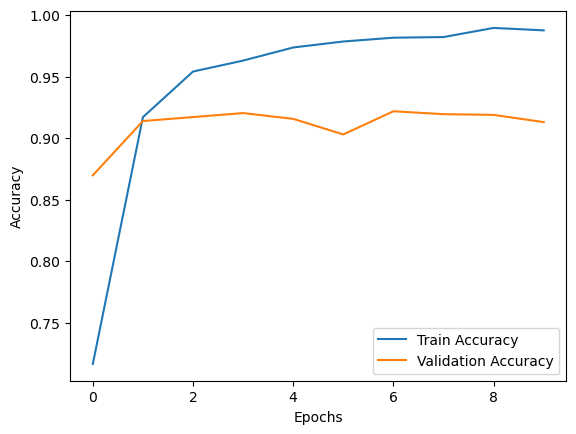

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()